# Imports

In [1]:
import pandas as pd
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

# Match images to metadata

In [9]:
df = pd.read_csv('data/labeled/METADATA.csv')
df.head()

,Name,Type1,Type2,Evolution
0,bulbasaur,Grass,Poison,ivysaur
1,ivysaur,Grass,Poison,venusaur
2,venusaur,Grass,Poison,NaN
3,charmander,Fire,NaN,charmeleon
4,charmeleon,Fire,NaN,charizard


In [10]:
pkmn_names_images = [f.split('/')[-1].split('.')[0] for f in os.listdir('data/labeled/images')]
print(len(pkmn_names_images), len(df))

809 809


In [11]:
A = set(pkmn_names_images)
B = set(df['Name'])
[x for x in A if x not in B], [x for x in B if x not in A]

([], [])

In [18]:
df['Type1'].nunique(), df['Type2'].nunique()

(18, 18)

# Display image

In [6]:
from src.image_utils import load_img, show_img, DATA_DIR

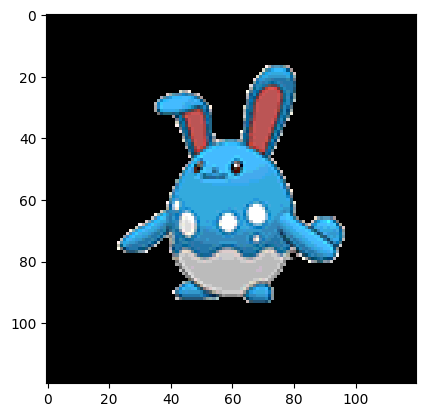

In [7]:
show_img('azumarill.png')

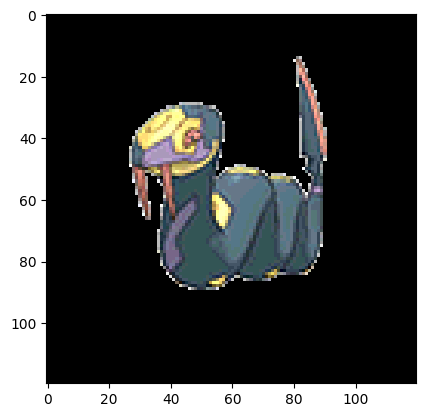

In [8]:
show_img()

# Whitespace on edges

In [12]:
imgs = [load_img(f) for f in tqdm(os.listdir(DATA_DIR))]

  0%|          | 0/809 [00:00<?, ?it/s]

In [13]:
min_xs, min_ys, max_xs, max_ys = [], [], [], []
for im in imgs:
    wheres = np.where(im)
    min_xs.append(min(wheres[0]))
    min_ys.append(min(wheres[1]))
    max_xs.append(max(wheres[0]))
    max_ys.append(max(wheres[1]))

print(min(min_xs), max(max_xs))
print(min(min_ys), max(max_ys))

0 119
0 119


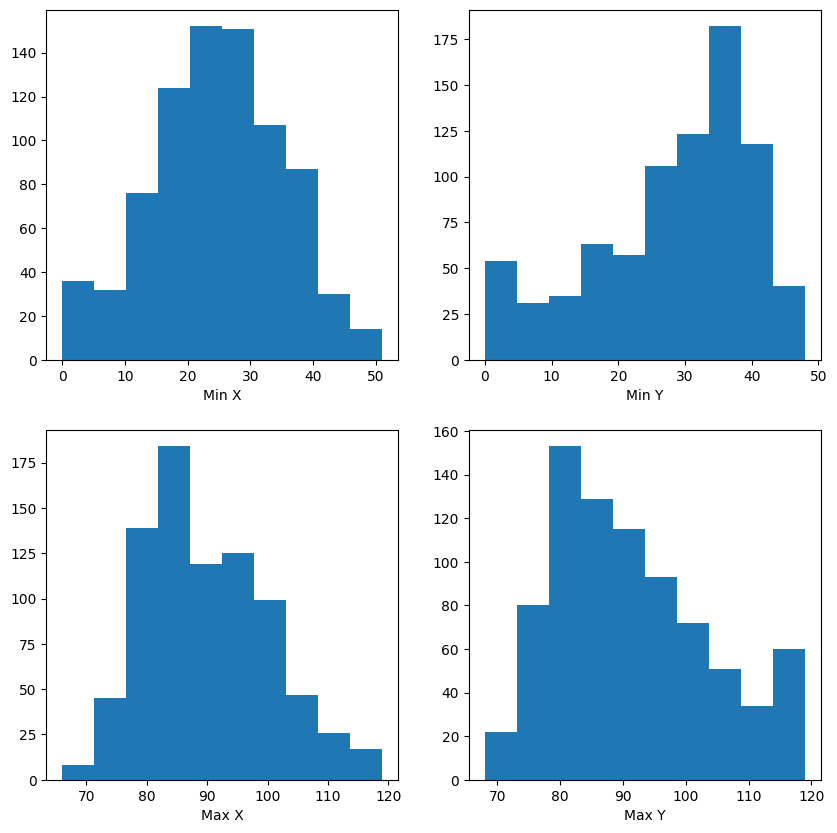

In [14]:
f,a = plt.subplots(2,2, figsize=(10,10))

a[0][0].hist(min_xs)
a[0][1].hist(min_ys)
a[1][0].hist(max_xs)
a[1][1].hist(max_ys)

a[0][0].set_xlabel('Min X')
a[0][1].set_xlabel('Min Y')
a[1][0].set_xlabel('Max X')
a[1][1].set_xlabel('Max Y')

plt.show()